In [26]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt


mu = 10
sigma = 5
sigma_sq = 25
sample_sizes = [10, 50, 100, 500]
confidence_levels = [0.90, 0.95, 0.99]
m = 1000

def calculate_intervals(data, alpha):
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)

    t_crit = stats.t.ppf(1 - alpha / 2, df=n-1)
    mean_ci_lower = sample_mean - t_crit * (sample_std / np.sqrt(n))
    mean_ci_upper = sample_mean + t_crit * (sample_std / np.sqrt(n))

    chi2_lower = stats.chi2.ppf(alpha / 2, df=n-1)
    chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n-1)
    var_ci_lower = ((n - 1) * sample_std**2) / chi2_upper
    var_ci_upper = ((n - 1) * sample_std**2) / chi2_lower

    return (mean_ci_lower, mean_ci_upper), (var_ci_lower, var_ci_upper)

results = []
for n in sample_sizes:
    for alpha in [1 - cl for cl in confidence_levels]:
        mean_coverage, var_coverage = 0, 0

        for _ in range(m):
            sample = np.random.normal(mu, sigma, n)
            mean_ci, var_ci = calculate_intervals(sample, alpha)

            if mean_ci[0] <= mu <= mean_ci[1]:
                mean_coverage += 1
            if var_ci[0] <= sigma_sq <= var_ci[1]:
                var_coverage += 1

        mean_coverage_rate = mean_coverage / m
        var_coverage_rate = var_coverage / m
        results.append({'Sample Size': n, 'Confidence Level': 1 - alpha,
                        'Mean Coverage': mean_coverage_rate, 'Variance Coverage': var_coverage_rate})

results_df = pd.DataFrame(results)
print(results_df)

    Sample Size  Confidence Level  Mean Coverage  Variance Coverage
0            10              0.90          0.901              0.903
1            10              0.95          0.952              0.954
2            10              0.99          0.989              0.995
3            50              0.90          0.887              0.896
4            50              0.95          0.949              0.959
5            50              0.99          0.994              0.992
6           100              0.90          0.907              0.890
7           100              0.95          0.952              0.947
8           100              0.99          0.992              0.988
9           500              0.90          0.908              0.892
10          500              0.95          0.952              0.949
11          500              0.99          0.989              0.991


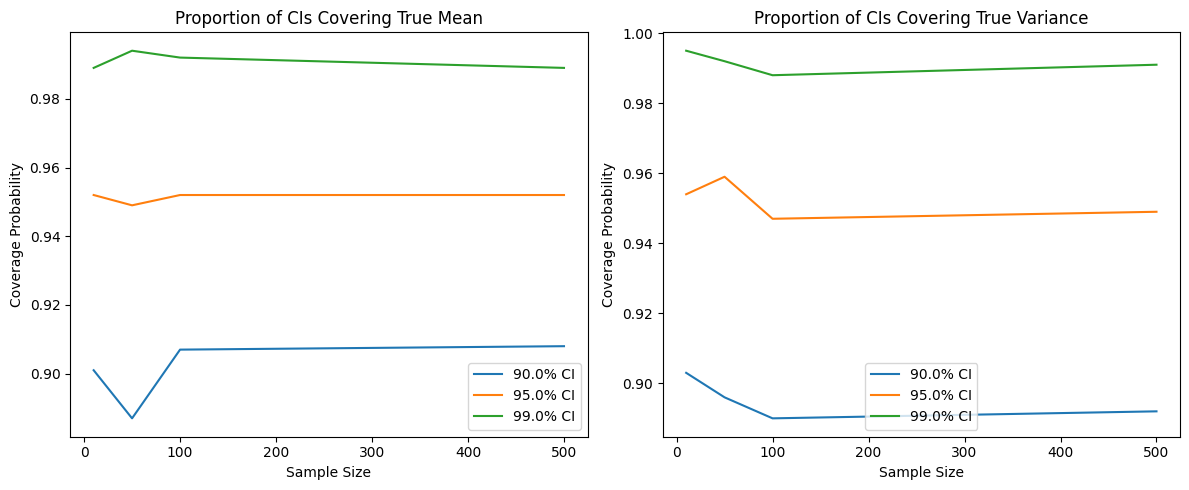

In [27]:
# PLOT
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for cl in confidence_levels:
    df_subset = results_df[results_df['Confidence Level'] == cl]
    axes[0].plot(df_subset['Sample Size'], df_subset['Mean Coverage'], label=f'{cl*100}% CI')
    axes[1].plot(df_subset['Sample Size'], df_subset['Variance Coverage'], label=f'{cl*100}% CI')

axes[0].set_title('Proportion of CIs Covering True Mean')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Coverage Probability')
axes[0].legend()

axes[1].set_title('Proportion of CIs Covering True Variance')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Coverage Probability')
axes[1].legend()

plt.tight_layout()
plt.show()


In [28]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

mu = 10          # True mean
sigma = 5          # True standard deviation
sigma_sq = sigma**2  # True variance
sample_sizes = [10, 50, 100, 500]  # Sample sizes
confidence_levels = [0.90, 0.95, 0.99]  # Confidence levels
m = 1000  # Number of simulations
noise_range = (-1, 1)  # Uniform noise range

# Function to calculate confidence intervals
def calculate_intervals(data, alpha):
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)

    # CI for Mean
    t_crit = stats.t.ppf(1 - alpha / 2, df=n-1)
    mean_ci_lower = sample_mean - t_crit * (sample_std / np.sqrt(n))
    mean_ci_upper = sample_mean + t_crit * (sample_std / np.sqrt(n))

    # CI for Variance
    chi2_lower = stats.chi2.ppf(alpha / 2, df=n-1)
    chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n-1)
    var_ci_lower = ((n - 1) * sample_std**2) / chi2_upper
    var_ci_upper = ((n - 1) * sample_std**2) / chi2_lower

    return (mean_ci_lower, mean_ci_upper), (var_ci_lower, var_ci_upper)

# Simulation to evaluate CI coverage with and without noise
results = []
for n in sample_sizes:
    for alpha in [1 - cl for cl in confidence_levels]:
        mean_coverage_no_noise, var_coverage_no_noise = 0, 0
        mean_coverage_with_noise, var_coverage_with_noise = 0, 0

        for _ in range(m):
            # Generate samples without noise
            sample = np.random.normal(mu, sigma, n)
            mean_ci, var_ci = calculate_intervals(sample, alpha)

            # Check CI success without noise
            if mean_ci[0] <= mu <= mean_ci[1]:
                mean_coverage_no_noise += 1
            if var_ci[0] <= sigma_sq <= var_ci[1]:
                var_coverage_no_noise += 1

            # Add uniform noise
            noise = np.random.uniform(noise_range[0], noise_range[1], n)
            noisy_sample = sample + noise
            mean_ci_noise, var_ci_noise = calculate_intervals(noisy_sample, alpha)

            # Check CI success with noise
            if mean_ci_noise[0] <= mu <= mean_ci_noise[1]:
                mean_coverage_with_noise += 1
            if var_ci_noise[0] <= sigma_sq <= var_ci_noise[1]:
                var_coverage_with_noise += 1

        # Calculate success proportions
        results.append({
            'Sample Size': n,
            'Confidence Level': 1 - alpha,
            'Mean Coverage (No Noise)': mean_coverage_no_noise / m,
            'Variance Coverage (No Noise)': var_coverage_no_noise / m,
            'Mean Coverage (With Noise)': mean_coverage_with_noise / m,
            'Variance Coverage (With Noise)': var_coverage_with_noise / m
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


    Sample Size  Confidence Level  Mean Coverage (No Noise)  \
0            10              0.90                     0.889   
1            10              0.95                     0.954   
2            10              0.99                     0.993   
3            50              0.90                     0.896   
4            50              0.95                     0.947   
5            50              0.99                     0.993   
6           100              0.90                     0.890   
7           100              0.95                     0.953   
8           100              0.99                     0.993   
9           500              0.90                     0.887   
10          500              0.95                     0.944   
11          500              0.99                     0.993   

    Variance Coverage (No Noise)  Mean Coverage (With Noise)  \
0                          0.906                       0.890   
1                          0.942                    

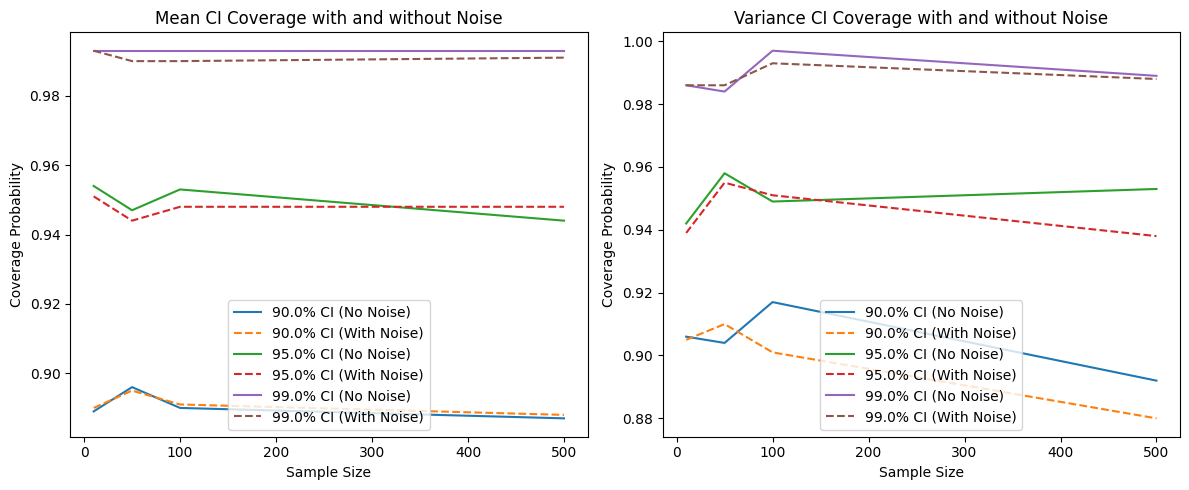

In [29]:
# Plot comparison with and without noise
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for cl in confidence_levels:
    df_subset = results_df[results_df['Confidence Level'] == cl]
    axes[0].plot(df_subset['Sample Size'], df_subset['Mean Coverage (No Noise)'], label=f'{cl*100}% CI (No Noise)')
    axes[0].plot(df_subset['Sample Size'], df_subset['Mean Coverage (With Noise)'], linestyle='--', label=f'{cl*100}% CI (With Noise)')

    axes[1].plot(df_subset['Sample Size'], df_subset['Variance Coverage (No Noise)'], label=f'{cl*100}% CI (No Noise)')
    axes[1].plot(df_subset['Sample Size'], df_subset['Variance Coverage (With Noise)'], linestyle='--', label=f'{cl*100}% CI (With Noise)')

axes[0].set_title('Mean CI Coverage with and without Noise')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Coverage Probability')
axes[0].legend()

axes[1].set_title('Variance CI Coverage with and without Noise')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Coverage Probability')
axes[1].legend()

plt.tight_layout()
plt.show()


Question 2

In [30]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
mu1, sigma1, n1 = 15, 5, 50
mu2, sigma2, n2 = 10, 7, 50
true_diff = mu1 - mu2
confidence_levels = [0.90, 0.95, 0.99]
m = 1000


results = []

# Simulation loop
for alpha in [1 - cl for cl in confidence_levels]:
    ci_coverage = 0  # Track successful intervals

    for _ in range(m):
        # Generate samples for both formulations
        sample1 = np.random.normal(mu1, sigma1, n1)
        sample2 = np.random.normal(mu2, sigma2, n2)

        # Sample means and variances
        mean1, mean2 = np.mean(sample1), np.mean(sample2)
        var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)

        # Difference in means
        mean_diff = mean1 - mean2

        # Standard error of the difference
        se_diff = np.sqrt(var1 / n1 + var2 / n2)

        # Degrees of freedom (Satterthwaite's approximation)
        df_num = (var1 / n1 + var2 / n2) ** 2
        df_denom = ((var1 / n1) ** 2 / (n1 - 1)) + ((var2 / n2) ** 2 / (n2 - 1))
        df = df_num / df_denom

        # Critical value from t-distribution
        t_crit = stats.t.ppf(1 - alpha / 2, df)

        # Confidence interval for the difference
        ci_lower = mean_diff - t_crit * se_diff
        ci_upper = mean_diff + t_crit * se_diff

        # Check if the true difference is captured
        if ci_lower <= true_diff <= ci_upper:
            ci_coverage += 1

    # Store results
    results.append({
        'Confidence Level': 1 - alpha,
        'Sample Size 1': n1,
        'Sample Size 2': n2,
        'Proportion Capturing True Difference': ci_coverage / m
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


   Confidence Level  Sample Size 1  Sample Size 2  \
0              0.90             50             50   
1              0.95             50             50   
2              0.99             50             50   

   Proportion Capturing True Difference  
0                                 0.912  
1                                 0.953  
2                                 0.990  


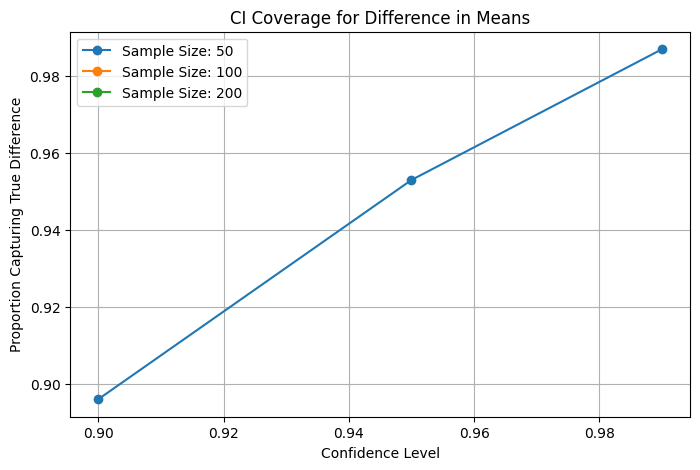

In [22]:
# Plot CI Coverage Results
plt.figure(figsize=(8, 5))
for n in [50, 100, 200]:
    subset = results_df[results_df['Sample Size 1'] == n]
    plt.plot(subset['Confidence Level'], subset['Proportion Capturing True Difference'], marker='o', label=f'Sample Size: {n}')

plt.title('CI Coverage for Difference in Means')
plt.xlabel('Confidence Level')
plt.ylabel('Proportion Capturing True Difference')
plt.legend()
plt.grid()
plt.show()


Question 3


In [10]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
p_values = [0.4, 0.5, 0.6, 0.7]  # Different proportions of support for Candidate A
n = 500  # Sample size
confidence_levels = [0.90, 0.95, 0.99]  # Confidence levels
m = 1000  # Number of simulations

# Store results
results = []

# Simulation loop
for p in p_values:
    for alpha in [1 - cl for cl in confidence_levels]:
        ci_coverage = 0

        for _ in range(m):
            # Generate Bernoulli samples
            sample = np.random.binomial(1, p, n)

            # Estimate proportion
            p_hat = np.mean(sample)

            # Standard error
            se = np.sqrt(p_hat * (1 - p_hat) / n)

            # Critical value from standard normal distribution
            z_crit = stats.norm.ppf(1 - alpha / 2)

            # Confidence interval
            ci_lower = p_hat - z_crit * se
            ci_upper = p_hat + z_crit * se

            # Check if true p is captured by CI
            if ci_lower <= p <= ci_upper:
                ci_coverage += 1

        # Store results
        results.append({
            'True Proportion (p)': p,
            'Confidence Level': 1 - alpha,
            'Sample Size': n,
            'Proportion Capturing True p': ci_coverage / m
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


    True Proportion (p)  Confidence Level  Sample Size  \
0                   0.4              0.90          500   
1                   0.4              0.95          500   
2                   0.4              0.99          500   
3                   0.5              0.90          500   
4                   0.5              0.95          500   
5                   0.5              0.99          500   
6                   0.6              0.90          500   
7                   0.6              0.95          500   
8                   0.6              0.99          500   
9                   0.7              0.90          500   
10                  0.7              0.95          500   
11                  0.7              0.99          500   

    Proportion Capturing True p  
0                         0.893  
1                         0.951  
2                         0.985  
3                         0.903  
4                         0.946  
5                         0.980  
6      

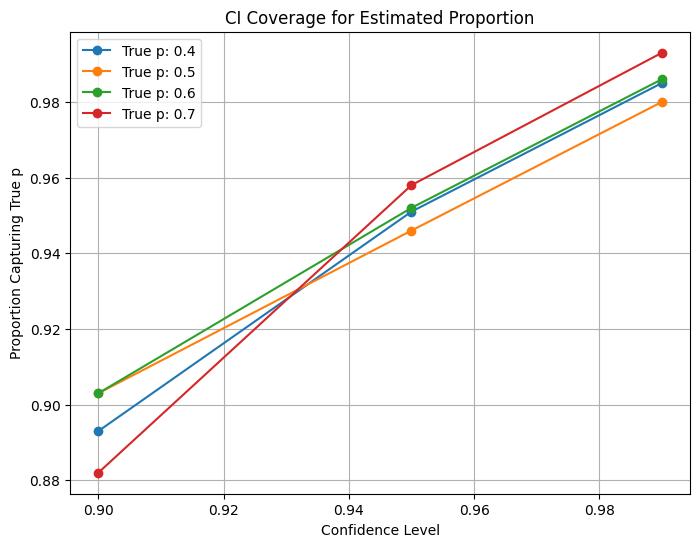

In [11]:
plt.figure(figsize=(8, 6))
for p in p_values:
    subset = results_df[results_df['True Proportion (p)'] == p]
    plt.plot(subset['Confidence Level'], subset['Proportion Capturing True p'], marker='o', label=f'True p: {p}')

plt.title('CI Coverage for Estimated Proportion')
plt.xlabel('Confidence Level')
plt.ylabel('Proportion Capturing True p')
plt.legend()
plt.grid()
plt.show()